### Исходный шаблон

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn import linear_model 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Загрузка данных

In [2]:
#%%capture
#!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [3]:
data = pd.read_excel('data/data_ford_price.xlsx') 

#  Отбор признаков: мотивация

## Предобработка данных

In [4]:
data = data[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace = True)

y = data['price']
x = data.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

## Обучение модели

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4682.957


## Удаление избыточного признака

In [6]:
x.drop('lat', axis = 1, inplace = True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4672.930


#  Отбор признаков: классификация методов

## Метод рекурсивного исключения признаков

In [9]:
from sklearn.feature_selection import RFE

In [10]:
y = data['price']
x = data.drop(columns='price')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [12]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'lat'], dtype=object)

In [13]:
X_train.columns

Index(['year', 'cylinders', 'odometer', 'lat', 'long', 'weather'], dtype='object')

In [14]:
selector.ranking_

array([1, 1, 4, 1, 3, 2])

##  МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ

In [15]:
from sklearn.feature_selection import SelectKBest, f_regression

In [16]:
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'odometer'], dtype=object)

# <center> Домашнее задание

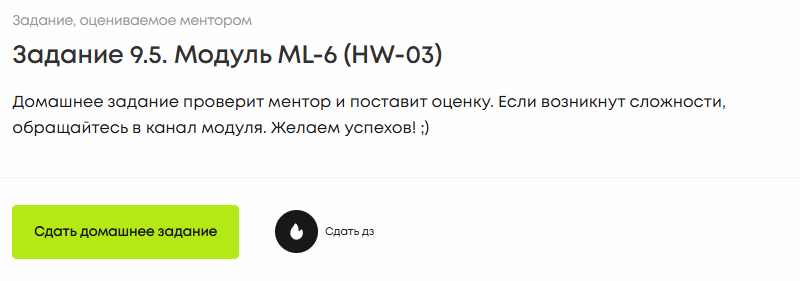

## **Основываясь на описании задания из сообщения ментора: Задача состоит в обучении задачи линейной регрессии на найденных двумя способами трех важных признаков и сравнить полученные результаты.**

In [209]:
# прочитаем исходную таблицы
data = pd.read_excel('data/data_ford_price.xlsx') 
data.head(3)

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0


Оставляем только "отобранные важные" признаки и ключевой признак "цена", для преобразования данных объединим эти списки:

In [210]:
data = data[['year', 'cylinders', 'lat', 'odometer', 'price']]
data.head(3)

,year,cylinders,lat,odometer,price
0,2016,6,36.471500,43500,43900
1,2009,8,40.468826,98131,15490
2,2002,8,42.477134,201803,2495


Построение гистограмм для отобранных признаков

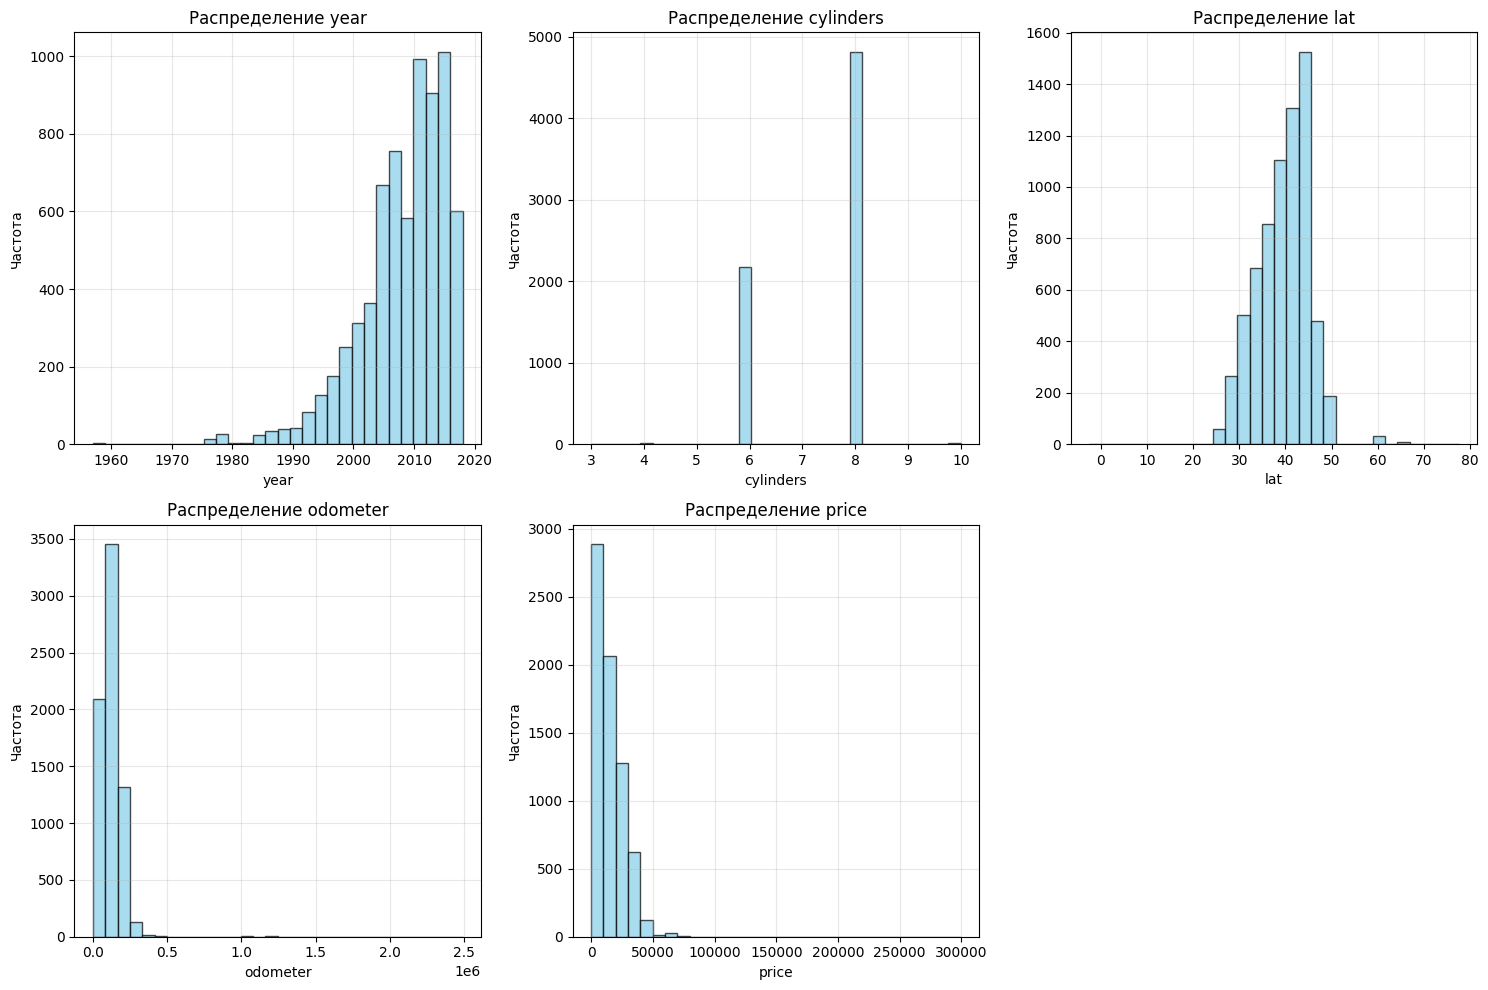

Основная статистика по отобранным признакам:
              year    cylinders          lat      odometer          price
count  7017.000000  7017.000000  7017.000000  7.017000e+03    7017.000000
mean   2007.869745     7.374662    39.550144  1.199787e+05   15121.549523
std       6.975329     0.942928     5.745409  8.992216e+04   11765.423119
min    1957.000000     3.000000    -2.508807  0.000000e+00       1.000000
25%    2004.000000     6.000000    35.661076  7.328500e+04    5995.000000
50%    2010.000000     8.000000    40.335245  1.180000e+05   12750.000000
75%    2013.000000     8.000000    43.582100  1.578040e+05   21995.000000
max    2018.000000    10.000000    77.617682  2.490000e+06  299500.000000


In [211]:
# Построим гистограммы для всех признаков
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()  # Превращаем в одномерный массив для удобства

columns = data.columns
for i, column in enumerate(columns):
    axes[i].hist(data[column], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Распределение {column}', fontsize=12)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Частота')
    axes[i].grid(True, alpha=0.3)

# Убираем лишний subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

# Также выведем основную статистику
print("Основная статистика по отобранным признакам:")
print(data.describe())

Проверим линейные зависимости с каждым признаком

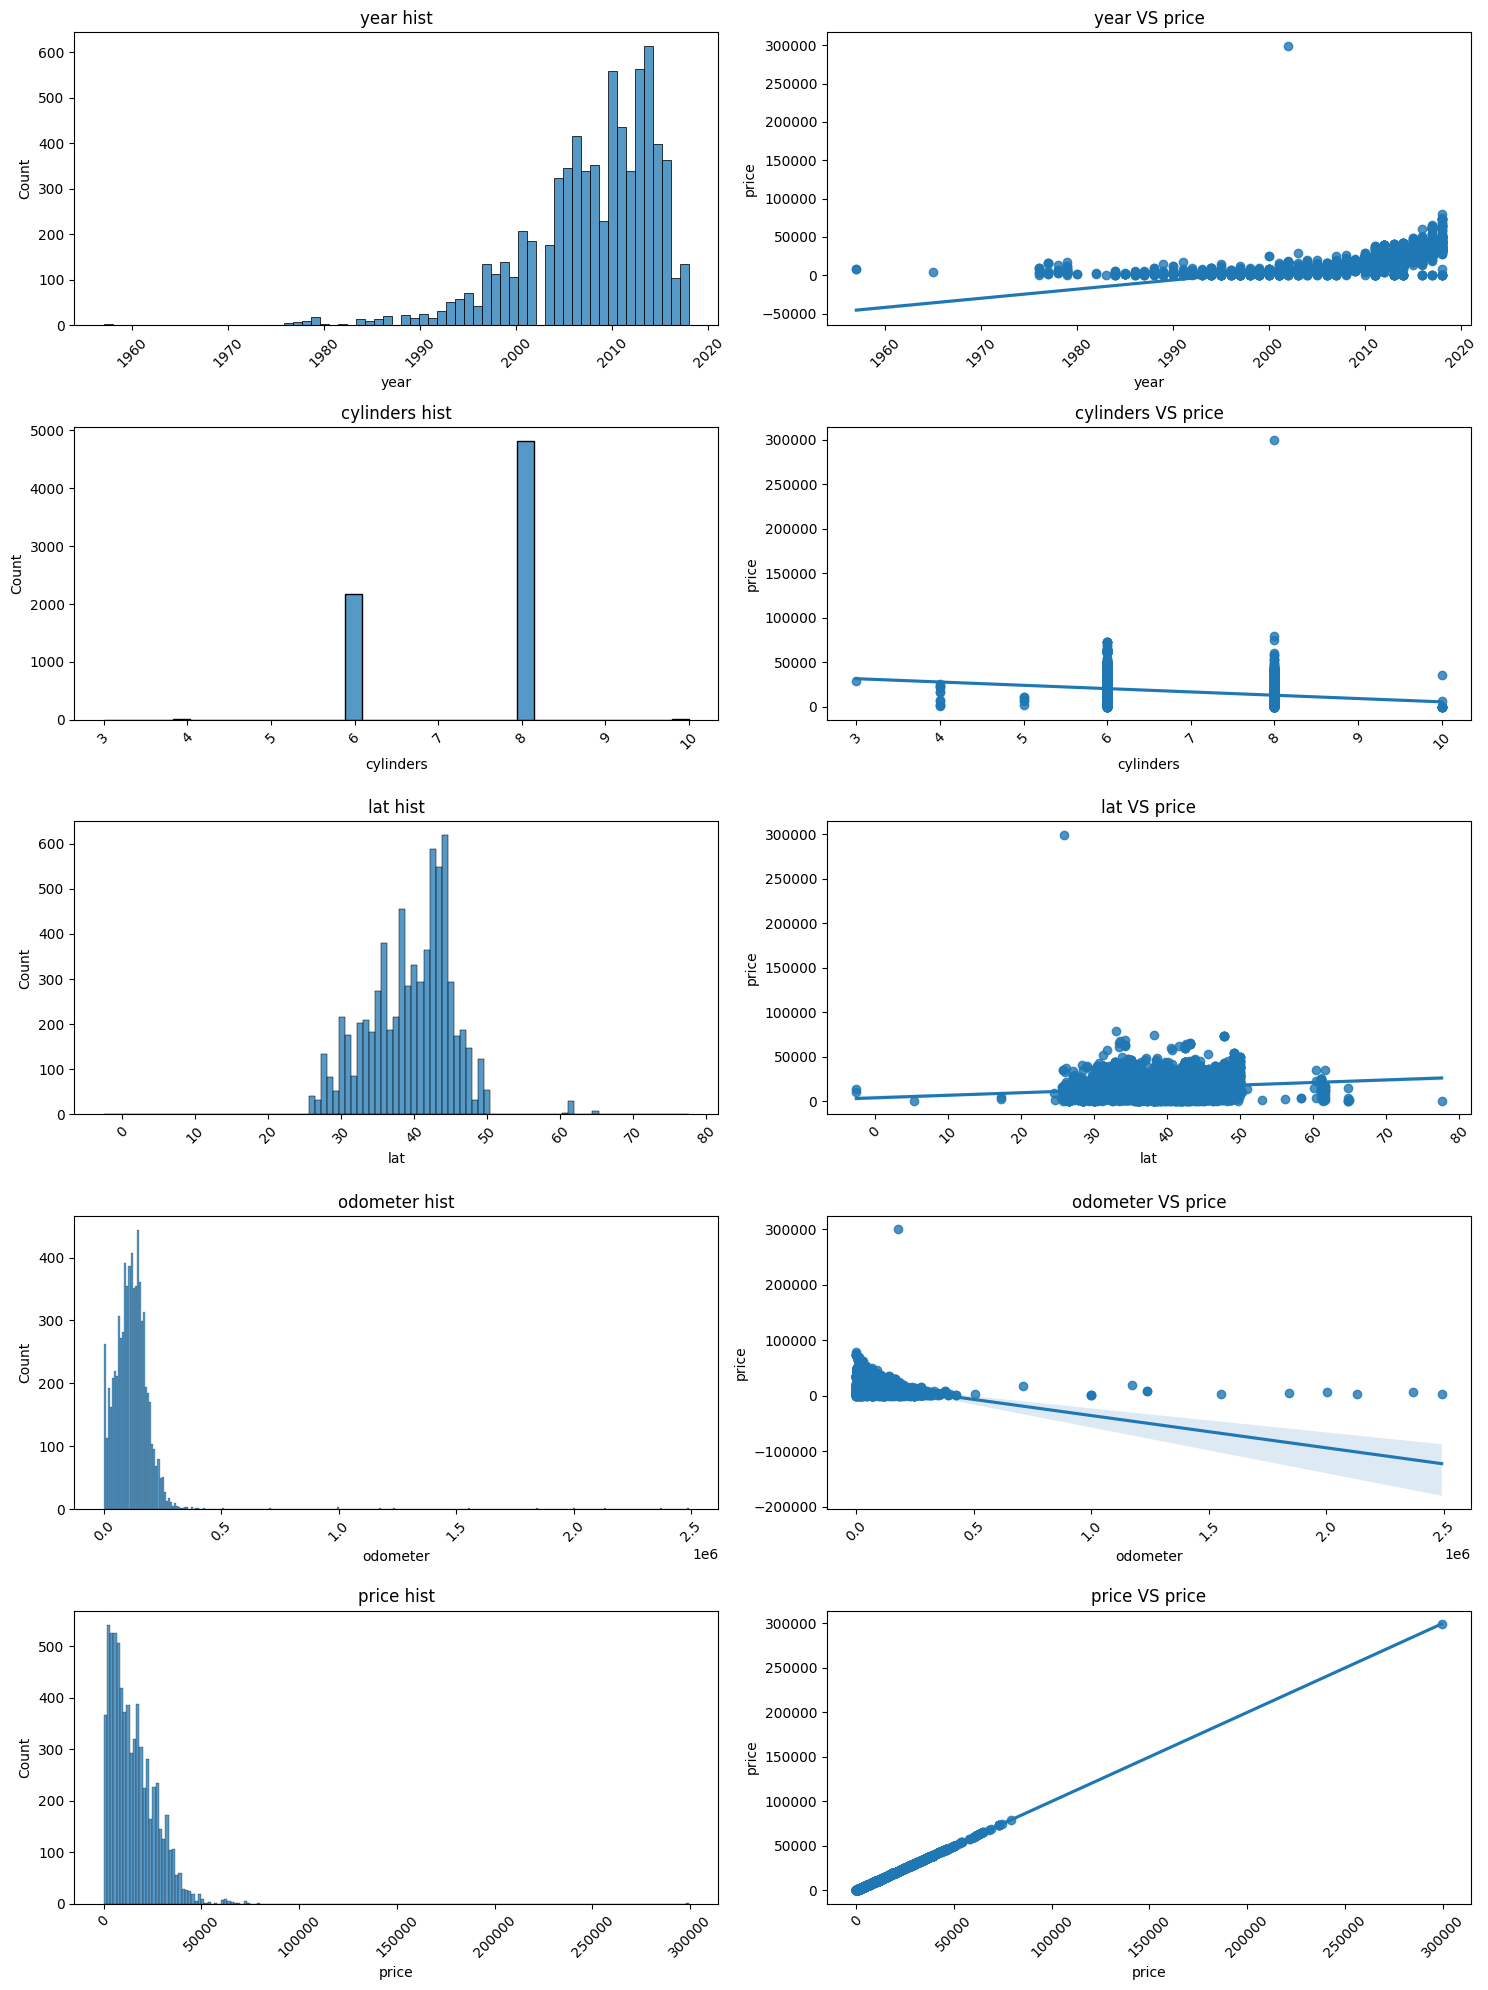

In [212]:
#выделяем имена числовых признаков в виде списка для удобства дальнейшей работы
types = data.dtypes
num_features = list(types[(types != 'object')].index)
num_features

#Для каждого числового признака построим гистограмму признаки и диаграмму рассеяния, иллюстрирующую зависимость целевого признака от каждого из факторов. Дополнительно поверх диаграммы рассеяния построим уравнение линейной регрессии. 
n = len(num_features) #количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(num_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака 
    histplot = sns.histplot(data=data, x=feature, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейную регрессию
    regplot = sns.regplot(data=data, x=feature, y='price', ax=axes[i][1])
    #Добавляем подпись графику
    regplot.set_title('{} VS price'.format(feature));
    #Добавляем поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

Построим тепловую карту

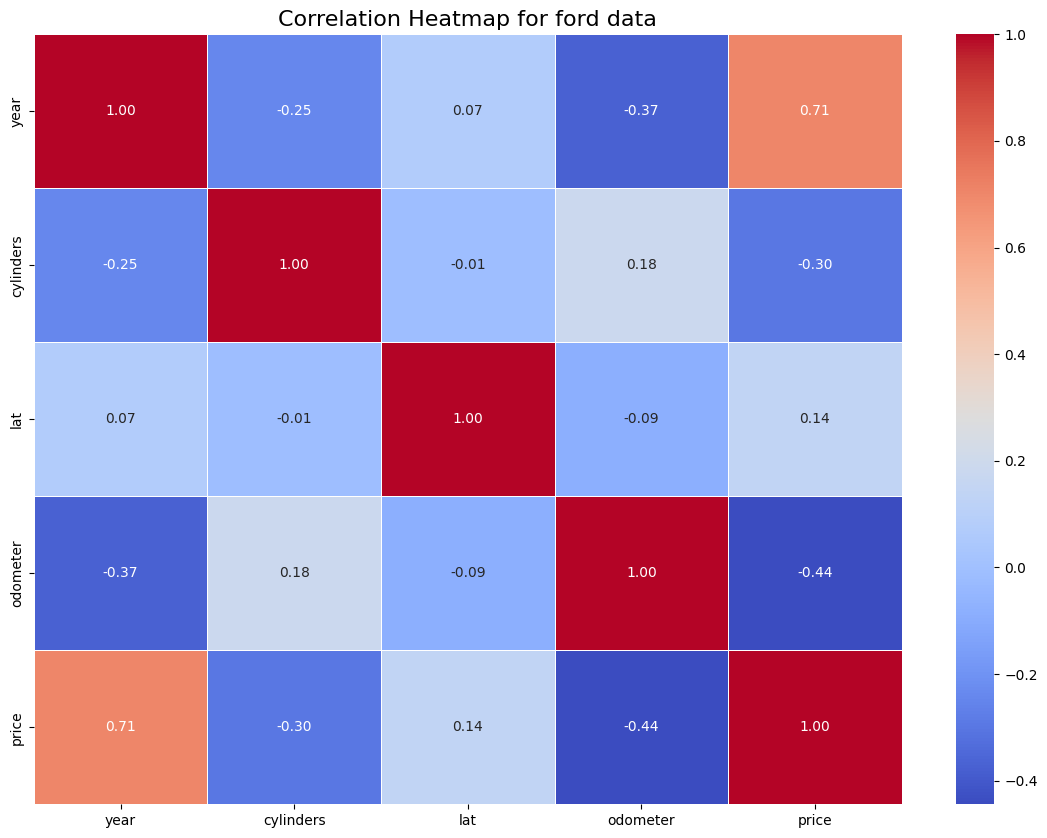

In [213]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for ford data", fontsize=16)
plt.show()

### Предварительный анализ и моделирование по всем исходным (не обработанным) признакам

Заранее создадим функцию, которая будет расчитывать метрики:

1. MAE - средняя абсолютная ошибка (целевая метрика)
2. MAPE - средняя абсолютная ошибка в процентах 
3. $R^2$ - коэффициент детерминации 

In [214]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

Разделим на тренировочную и тестовую выборки

In [215]:
#X - матрица наблюдений, y - столбец правильных ответов
X = data.drop('price', axis=1)
y = data['price']

#Разделяем выборку на тренировочную и тестовую в соотношении 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (5613, 4)
Test shape: (1404, 4)


Линейная регрессия 

In [216]:
#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.539
Train MAE: 4977.876
Train MAPE: 10677.407


Test R^2: 0.627
Test MAE: 4816.881
Test MAPE: 21412.366


*ошибка достаточно большая* - **MAPE** не реалистично высокий, в данных есть выбросы. Вывод: нужна обработка данных.  

### Сделаем преобразование данных

Логарифмического преобразование 'price'

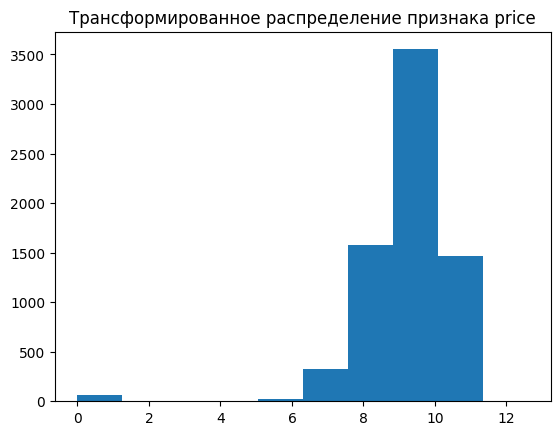

In [217]:
data['price'] = np.log(data['price'])

# выведем гистограмма
log_price = data['price']
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

Нормализация методом RobustScaler для 'odometer'

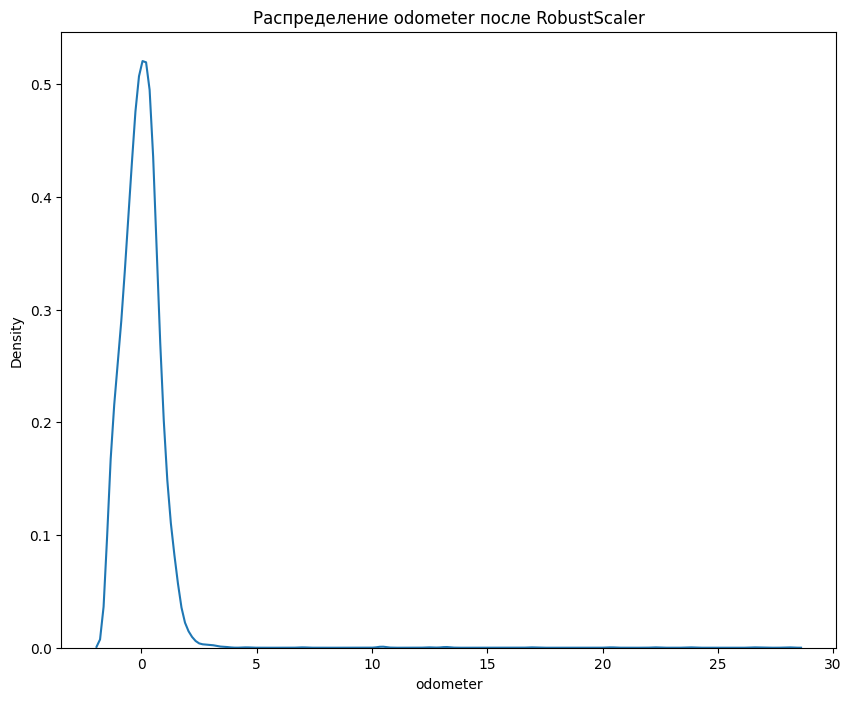

In [218]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# Преобразуем в 2D массив для RobustScaler
df = data['odometer'].values.reshape(-1, 1)
df_r = r_scaler.fit_transform(df)

# Преобразуем обратно в DataFrame для визуализации
df_r = pd.DataFrame(df_r, columns=['odometer'])

# Применяем преобразование к исходным данным
data['odometer'] = df_r['odometer'].values

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределение odometer после RobustScaler')

sns.kdeplot(data=df_r, x='odometer', ax=ax1)
plt.show()

Преобразуем признак 'year'

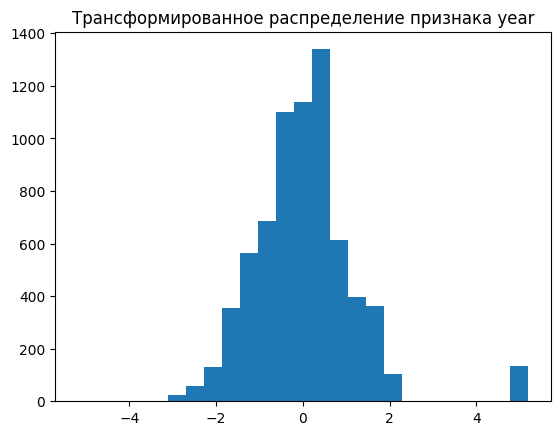

In [219]:
# Данный трансформер принимает на вход 2D-массив, поэтому нам надо изменить формат данных (поскольку мы подаём на вход только один столбец)
data_for_transform = data['year'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)

data['year'] = data_transformed.flatten()

 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

Преобразуем признак 'lat'

C:\Users\tgorbunov\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


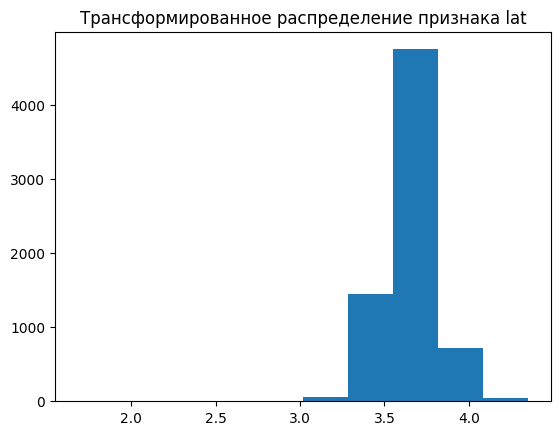

In [220]:
data['lat'] = np.log(data['lat'])

# выведем гистограмма
log_lat = data['lat']
plt.hist(log_lat)
plt.title('Трансформированное распределение признака lat')
plt.show()

Избавимся от выбросов с помощью метода z-отклонений на логарифмированных признаках. 

In [221]:
#Объявляем функцию, реализующую фильтрацию выбросов по методу z-отклонений
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
#Производим очистку 
outliers, data_cleaned = outliers_z_score(data, 'price', log_scale=True)
outliers, data_cleaned = outliers_z_score(data_cleaned, 'odometer', log_scale=True)
outliers, data_cleaned = outliers_z_score(data_cleaned, 'year', log_scale=True)
outliers, data_cleaned = outliers_z_score(data_cleaned, 'lat', log_scale=True)
print('Shape before cleaning outliers: {}'.format(data.shape))
print('Shape after cleaning outliers: {}'.format(data_cleaned.shape))

Shape before cleaning outliers: (7017, 5)
Shape after cleaning outliers: (4892, 5)


Количество цилиндров является номинальным признаком, закодируем его с помощью OneHotEncoding

In [222]:
one_hot_encoder = OneHotEncoder()
columns_to_change = ['cylinders']
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data_cleaned[columns_to_change]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8' 'cylinders_10']


In [223]:
# Преобразуем numpy array в DataFrame и добавляем к исходным данным
data_onehot_df = pd.DataFrame(data_onehot, columns=column_names, index=data_cleaned.index)
data_cleaned = pd.concat([data_cleaned, data_onehot_df], axis=1)

# удаляем оригинальный столбец cylinders 
data_cleaned = data_cleaned.drop('cylinders', axis=1)

data_cleaned.head(3)

,year,lat,odometer,price,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_10
0,1.558482,3.596531,-0.881459,10.689670,0.0,0.0,1.0,0.0,0.0
1,-0.041413,3.700532,-0.235083,9.647950,0.0,0.0,0.0,1.0,0.0
4,0.099274,3.896116,0.568653,9.537123,0.0,0.0,0.0,1.0,0.0


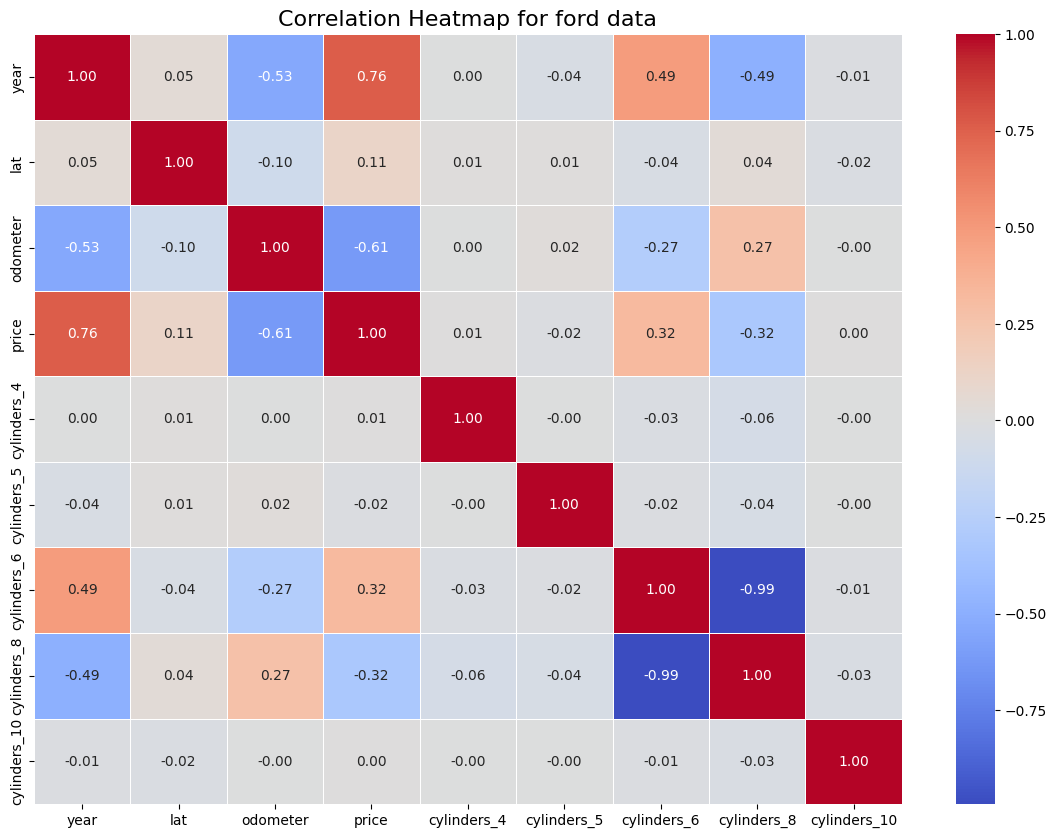

In [224]:
plt.figure(figsize=(14, 10))
sns.heatmap(data_cleaned.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for ford data", fontsize=16)
plt.show()

In [225]:
# признаки 6 и 8 цилиндров мультиколлинеарны, удалим один из них
data_cleaned = data_cleaned.drop('cylinders_8', axis=1)

In [226]:
# Возвращаем price из логарифма обратно в доллары
data_cleaned['price'] = np.exp(data_cleaned['price'])
data_cleaned.head(3)

,year,lat,odometer,price,cylinders_4,cylinders_5,cylinders_6,cylinders_10
0,1.558482,3.596531,-0.881459,43900.0,0.0,0.0,1.0,0.0
1,-0.041413,3.700532,-0.235083,15490.0,0.0,0.0,0.0,0.0
4,0.099274,3.896116,0.568653,13865.0,0.0,0.0,0.0,0.0


Повторим линейную регрессию на всех данных после обработки

In [227]:
#X - матрица наблюдений, y - столбец правильных ответов
X = data_cleaned.drop('price', axis=1)
y = data_cleaned['price']
#Разделяем выборку на тренировочную и тестовую в соотношении 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (3913, 7)
Test shape: (979, 7)


In [228]:
#создаем логарифмированный целевой признак цены
y_train_log = np.log(y_train)

#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель предсказывать логарифм целевого признака
lr.fit(X_train, y_train_log)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = np.exp(lr.predict(X_train))
y_test_pred = np.exp(lr.predict(X_test))
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.414
Train MAE: 3694.384
Train MAPE: 38.441


Test R^2: 0.699
Test MAE: 3472.742
Test MAPE: 30.450


*ошибка стала ниже* - **MAPE** более реалестичен ~30% на тестовой выборке. Вывод: модель недоучена, нужно улучшать дальше

Попробуем добавить в данные полиномиальные признаки и построить модель полиномиальной регрессии. Предварительно нормализуем данные:

In [229]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (3913, 119)
Test shape: (979, 119)


**Линейная регрессия с L2-регуляризацией**

In [230]:
#Инициализируем объект класса линейная регрессия с L2-регуляризацией 
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель предсказывать логарифм целевого признака
ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = np.exp(ridge_lr_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.715
Train MAE: 3410.268
Train MAPE: 36.383


Test R^2: 0.739
Test MAE: 3265.386
Test MAPE: 29.282


Подбор параметра регуляризации $\alpha$

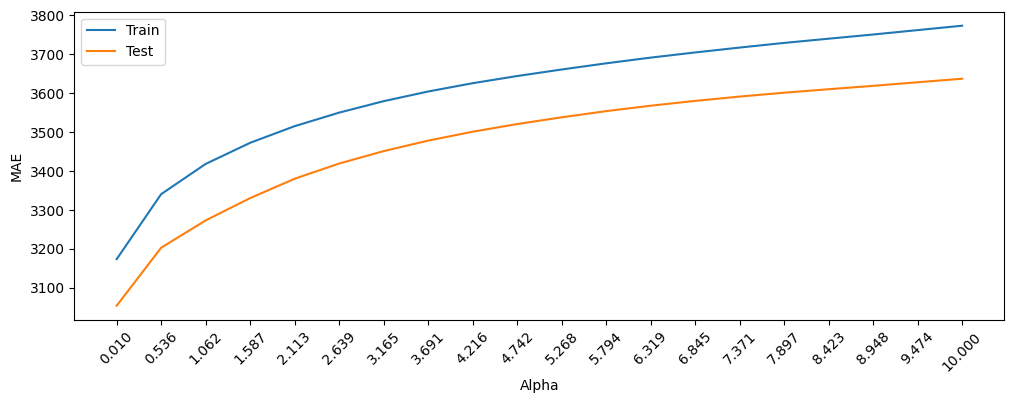

In [231]:
#Создаем список из 20 возможных значений от 0.001 до 10
alpha_list = np.linspace(0.01, 10, 20)
#Создаем пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []
for alpha in alpha_list:
    #Создаем объект класса линейная регрессия с L2-регуляризацией
    ridge_lr_poly = linear_model.Ridge(alpha=alpha, max_iter=10000)
    #Обучаем модель предсказывать логарифм целевого признака
    ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)
    #Делаем предсказание для каждой из выборок
    #Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
    y_train_predict_poly = np.exp(ridge_lr_poly.predict(X_train_scaled_poly))
    y_test_predict_poly = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))
    #Рассчитываем метрику для двух выборок и добавляем их в списки
    train_scores.append(metrics.mean_absolute_error(y_train, y_train_predict_poly))
    test_scores.append(metrics.mean_absolute_error(y_test, y_test_predict_poly))

#Визуализируем изменение R^2 в зависимости от alpha
fig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(alpha_list, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_scores, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('MAE') #название оси ординат
ax.set_xticks(alpha_list) #метки по оси абцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды

Наилучшее значение метрики соотвествует alpha=0.01 

Обучим модель линейной регрессии с L2-регуляризацией с коэффициентов регуляризации alpha=0.01

*Финальная модель*

In [232]:
#Создаем объект класса линейная регрессия с L2-регуляризацией
#Выставляем параметр alpha в подобранное выше значение
ridge_lr = linear_model.Ridge(alpha=0.01)
#Обучаем модель предсказывать логарифм целевого признака
ridge_lr.fit(X_train_scaled_poly, y_train_log)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = np.exp(ridge_lr.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_lr.predict(X_test_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.747
Train MAE: 3173.192
Train MAPE: 35.334


Test R^2: 0.761
Test MAE: 3053.515
Test MAPE: 27.859


Наилучший показатель которого смогли добиться **R2 = 0.761 и MAPE = 27.8%**.

Далее проведем анализ важности признаков и сравним результаты методов отбора

### <center> Моделирование #1 по результатам **Метод рекурсивного исключения признаков (RFE)**

Data Set #1 with ['year', 'cylinders', 'lat']

In [233]:
#удаляем 'odometer'
X_train_set_1 = X_train.drop('odometer', axis=1)
X_test_set_1 = X_test.drop('odometer', axis=1)

#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train_set_1)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train_set_1)
X_test_scaled = scaler.transform(X_test_set_1)

#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=5, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

#Создаем объект класса линейная регрессия с L2-регуляризацией
#Выставляем параметр alpha в подобранное выше значение
ridge_lr = linear_model.Ridge(alpha=0.01)
#Обучаем модель предсказывать логарифм целевого признака
ridge_lr.fit(X_train_scaled_poly, y_train_log)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = np.exp(ridge_lr.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_lr.predict(X_test_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.676
Train MAE: 3710.277
Train MAPE: 37.841


Test R^2: 0.689
Test MAE: 3615.073
Test MAPE: 31.976


### <center> Моделирование #2 по результатам **МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ**

Data Set #2 ['year', 'cylinders', 'odometer']

In [234]:
#удаляем 'lat'
X_train_set_2 = X_train.drop('lat', axis=1)
X_test_set_2 = X_test.drop('lat', axis=1)

#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train_set_2)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train_set_2)
X_test_scaled = scaler.transform(X_test_set_2)

#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=5, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

#Создаем объект класса линейная регрессия с L2-регуляризацией
#Выставляем параметр alpha в подобранное выше значение
ridge_lr = linear_model.Ridge(alpha=0.01)
#Обучаем модель предсказывать логарифм целевого признака
ridge_lr.fit(X_train_scaled_poly, y_train_log)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = np.exp(ridge_lr.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_lr.predict(X_test_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.742
Train MAE: 3223.988
Train MAPE: 35.864


Test R^2: 0.762
Test MAE: 3101.299
Test MAPE: 28.025


### **Вывод:**

1. Наилучший показатель метрик был достигнут моделью со всеми признаками включительно (R2 = 0.76, MAE = 3053$, MAPE 27.9%)

2. Сравнивая "Методы Отбора Признаков" наилучший результат показал *МЕТОД ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ* (R2 = 0.76, MAE = 3101$, MAPE 28.0%)

3. Для улучшения модели необходимо больше признаков (модель, расход топлива, налог, наличие ДТП, привод, трансмиссия и тд). В виду малого количества признаков результат не является "отличным" но вполне "удовлетворительным" и позволяет приблизительно оценить стоимость автомобиля.

4. Лучший результат был достигнут "линейной регрессии с L2-регуляризацией с коэффициентов регуляризации alpha=0.01"